The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [84]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np


In [85]:
df = pd.read_csv("data/nobel.csv")
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [86]:
df.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

In [87]:
df.shape

(1000, 18)

In [88]:
#1-find the most common gender and birth country

In [89]:
print(df["sex"].value_counts())
top_gender = "Male"
print(df["birth_country"].value_counts())
top_country = "United States of America"

Male      905
Female     65
Name: sex, dtype: int64
United States of America                        291
United Kingdom                                   91
Germany                                          67
France                                           58
Sweden                                           30
                                               ... 
Austria-Hungary (Ukraine)                         1
Ottoman Empire (Turkey)                           1
Russian Empire (Azerbaijan)                       1
Bosnia (Bosnia and Herzegovina)                   1
French protectorate of Tunisia (now Tunisia)      1
Name: birth_country, Length: 129, dtype: int64


In [90]:
df["born_usa"] = df["birth_country"] == "United States of America"
df

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,born_usa
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,False
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,False
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1030,Individual,Louis Brus,1943-00-00,"Cleveland, OH",United States of America,Male,Columbia University,"New York, NY",United States of America,NaN,NaN,NaN,True
996,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1031,Individual,Aleksey Yekimov,1945-00-00,NaN,USSR (now Russia),Male,Nanocrystals Technology Inc.,"New York, NY",United States of America,NaN,NaN,NaN,False
997,2023,Literature,The Nobel Prize in Literature 2023,"""for his innovative plays and prose which give...",1/1,1032,Individual,Jon Fosse,1959-09-29,Haugesund,Norway,Male,NaN,NaN,NaN,NaN,NaN,NaN,False
998,2023,Peace,The Nobel Peace Prize 2023,"""for her fight against the oppression of women...",1/1,1033,Individual,Narges Mohammadi,1972-04-21,Zanjan,Iran,Female,NaN,NaN,NaN,NaN,NaN,NaN,False


In [91]:
#2-Identify the decade with the highest ratio of US-born winners

In [92]:
df['decade'] = (np.floor(df['year'] / 10) * 10).astype(int)
prop_usa_winners = df.groupby('decade', as_index=False)['born_usa'].mean()
max_decade_usa = prop_usa_winners[prop_usa_winners['born_usa'] == prop_usa_winners['born_usa'].max()]['decade'].values[0]
max_decade_usa

2000

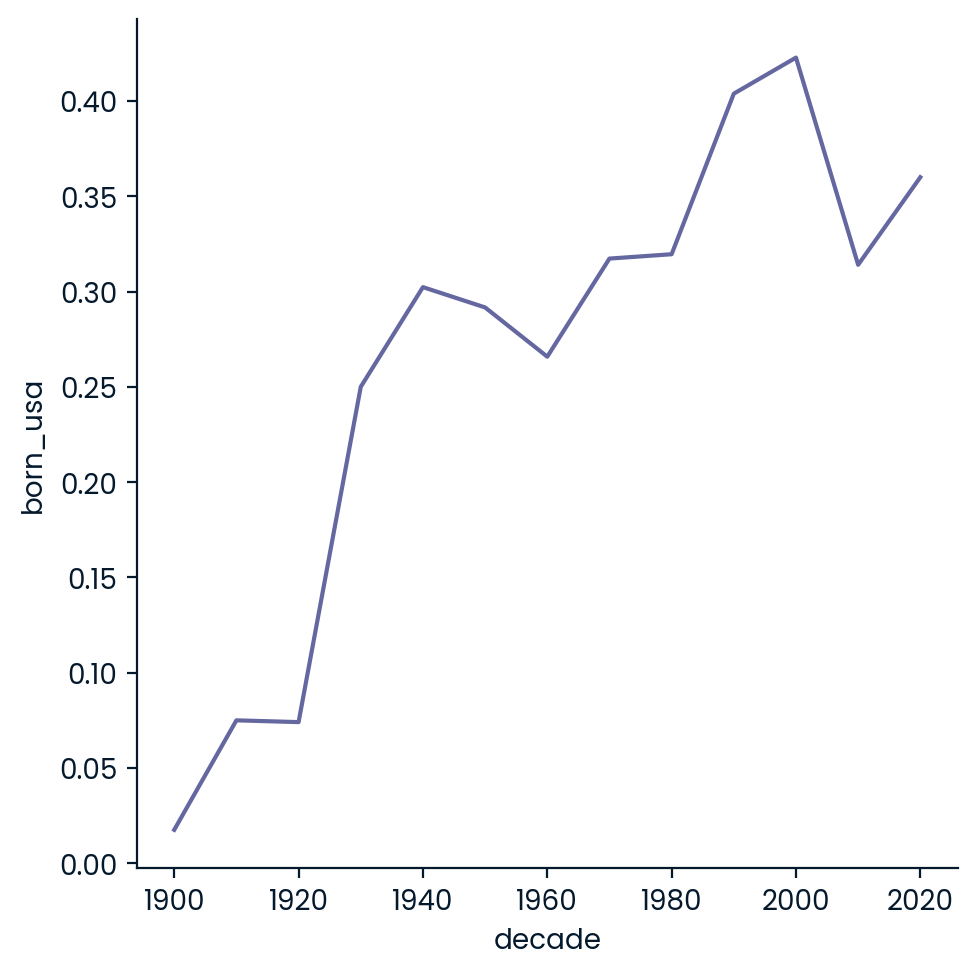

In [93]:
ax1 = sns.relplot(x='decade', y='born_usa', data=prop_usa_winners, kind="line")


In [94]:
#3-Find the decade and category with the highest proportion of female laureates

In [95]:
df["female_winner"] = df["sex"] == "Female"
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,born_usa,decade,female_winner
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900,False
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,False,1900,False
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900,False
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,False,1900,False
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,False,1900,False


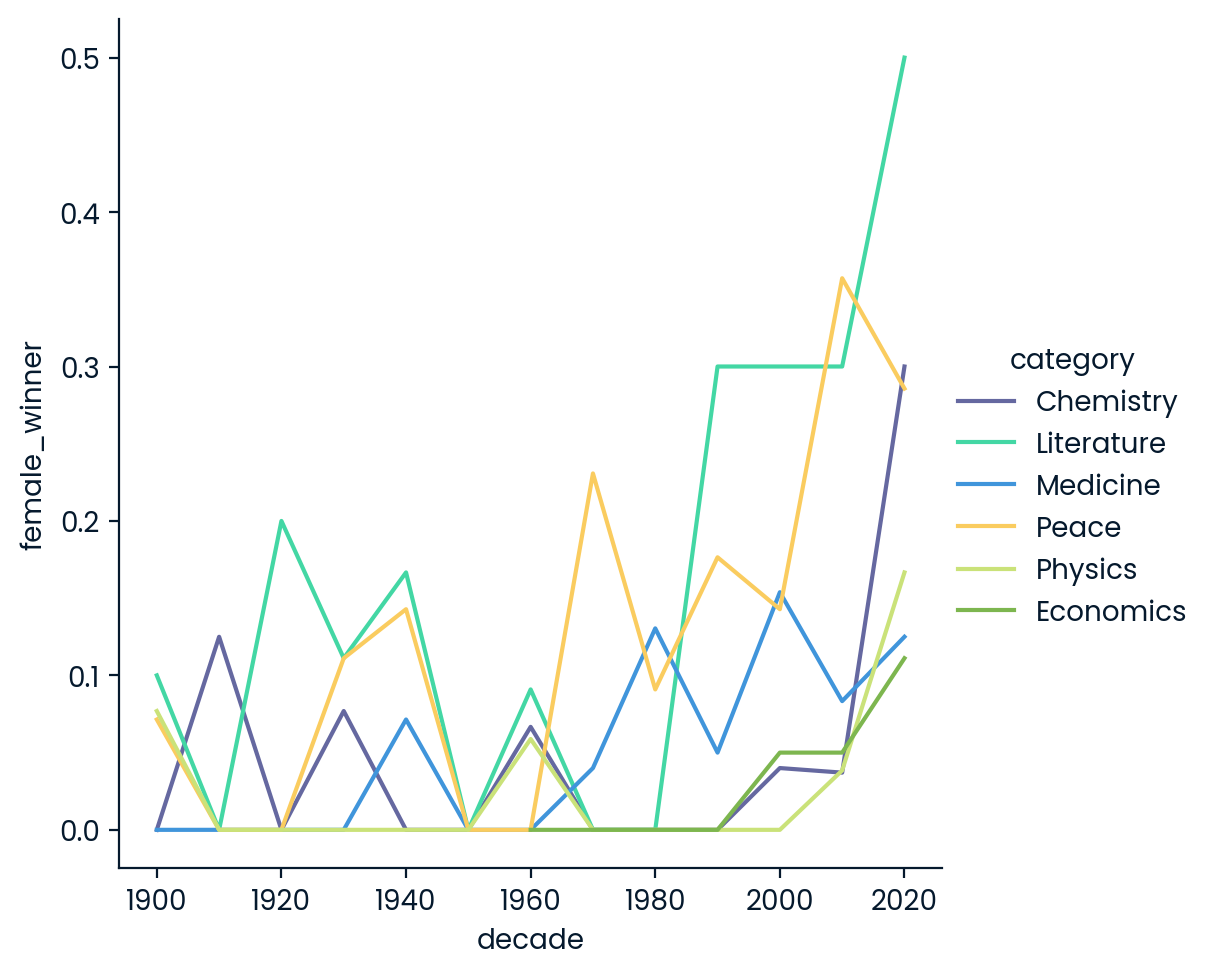

In [96]:
prop_female_winners = df.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()
max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'category']]
max_female_dict = {max_female_decade_category['decade'].values[0]: max_female_decade_category['category'].values[0]}
ax2 = sns.relplot(x='decade', y='female_winner', hue='category', data=prop_female_winners, kind="line")


In [97]:
#4-Find first woman to win a Nobel Prize

In [98]:
df1 = df[df["sex"] == "Female"]
first_woman_name = df1.iloc[0]["full_name"]
first_woman_category = df1.iloc[0]["category"]
print(first_woman_name)
print(first_woman_category)

Marie Curie, née Sklodowska
Physics


In [99]:
#5-Determine repeat winners

In [100]:
names_with_counts = df["full_name"].value_counts()
names_to_keep = names_with_counts[names_with_counts >= 2].index

repeat_list = list(names_to_keep)
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']